**Linear Data**


In [23]:
import sys
print(sys.path)

['C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers\\pydev', '/root/temp_janis_test_parallellization', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/root/temp_janis_test_parallellization/hierarchicalcausalmodels', '/root/temp_janis_test_parallellization/hierarchicalcausalmodels']


In [24]:
from hierarchicalcausalmodels.models.HSCMParallel import HSCMParallel

In [30]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [31]:

# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [50] * 50# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: a},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: b +1, "c": lambda c: -c},
    
    "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
}


In [32]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [35]:

# Sample data from the model
sampled_data = hscm.sample_data()


TypeError: 'NoneType' object is not subscriptable

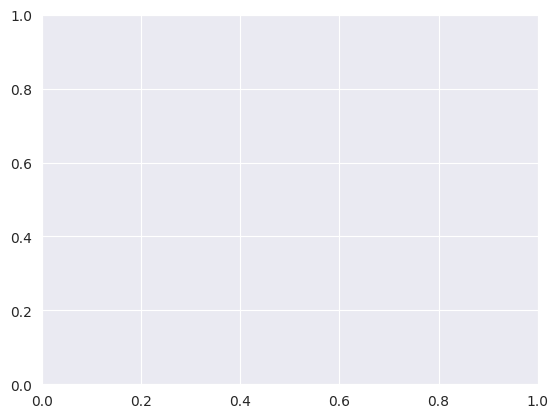

In [34]:

# Plot the sampled data
hscm.plot_data()


In [83]:
import json

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

# Save the sampled data
#save_sampled_data(sampled_data, 'data/sampled_data.json')

print("Sampled data has been saved to 'sampled_data.json'")


Sampled data has been saved to 'sampled_data.json'


In [84]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [85]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data_no_intervention()


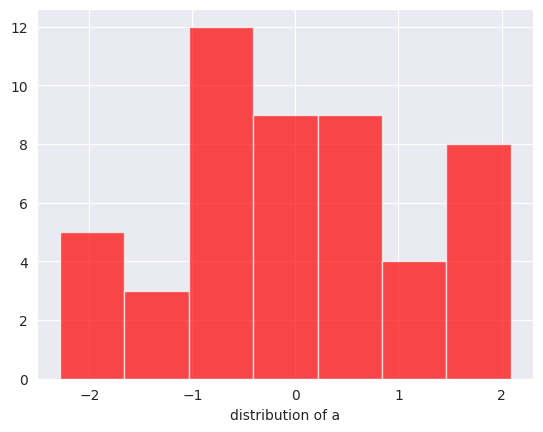

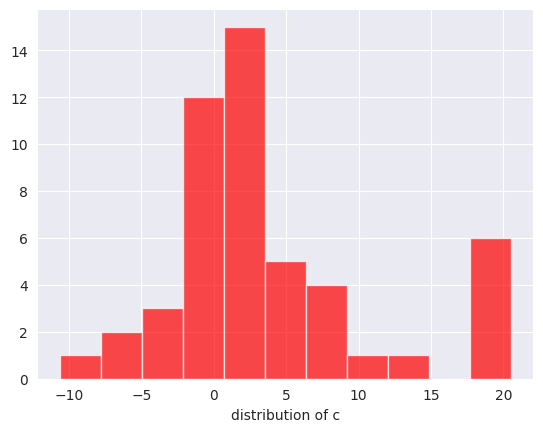

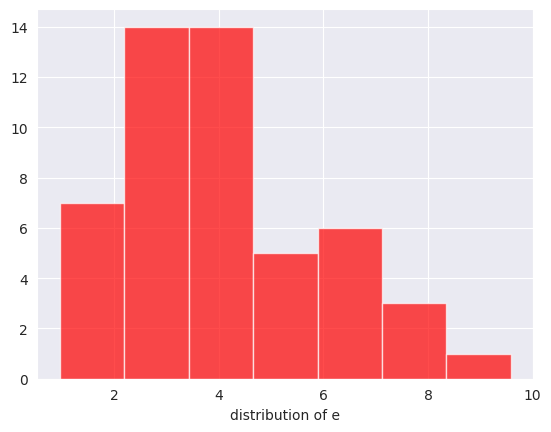

[[-2.2851809248566317,
  -0.18706956154054072,
  -0.8957976180983794,
  1.1581466933559341,
  0.10234227020960239,
  1.3736192657346615,
  1.1273892431992698,
  -0.44909953767250255,
  -0.6703754639657042,
  -0.5911477487426356,
  0.9707919640698808,
  -0.06478064898210775,
  0.06568450599652272,
  2.06572520328337,
  -0.017751670416789177,
  2.090117361150593,
  0.6287442945395556,
  -1.1923899237886326,
  0.1304157104890303,
  -0.29539845351535937,
  0.7009724555947582,
  -2.245188762178732,
  0.17668830362063162,
  -0.012628419207320095,
  -0.7663564245775801,
  2.071726171152614,
  0.3434919575516253,
  0.3786787788307967,
  0.7848923809157177,
  -1.5300066507162222,
  1.6193245417717368,
  -0.5765618436106839,
  -1.6909262654875044,
  -0.08418003967212634,
  -0.530163116343914,
  0.6615568056364518,
  0.13069027727460203,
  -1.6978168496142083,
  1.7778688244194918,
  -0.71339937490706,
  0.7780051343387236,
  -0.2826945513849332,
  0.9115950110925971,
  -0.587270343981821,
  -0.3

In [86]:

hscm.plot_data_resampled()

In [87]:
print(new_sampled_data)

{'a0': 0.7780051343387236, 'a1': -1.6978168496142083, 'a2': 2.071726171152614, 'a3': -1.6978168496142083, 'a4': -0.71339937490706, 'a5': -1.6909262654875044, 'a6': 0.6287442945395556, 'a7': 0.5484782480770811, 'a8': 1.6193245417717368, 'a9': -0.18706956154054072, 'a10': 0.9707919640698808, 'a11': -0.587270343981821, 'a12': 1.3736192657346615, 'a13': -1.1923899237886326, 'a14': -0.5765618436106839, 'a15': 0.7848923809157177, 'a16': -2.2851809248566317, 'a17': 1.7778688244194918, 'a18': -0.71339937490706, 'a19': -0.5476573514441356, 'a20': -0.530163116343914, 'a21': -0.2826945513849332, 'a22': 2.090117361150593, 'a23': -0.012628419207320095, 'a24': 2.071726171152614, 'a25': 0.5484782480770811, 'a26': -0.5911477487426356, 'a27': -1.3115105567140084, 'a28': 0.3786787788307967, 'a29': 0.06568450599652272, 'a30': 1.1581466933559341, 'a31': -0.06478064898210775, 'a32': 2.090117361150593, 'a33': -0.5476573514441356, 'a34': -0.012628419207320095, 'a35': 0.7848923809157177, 'a36': -0.53016311634

In [88]:
#save_sampled_data(new_sampled_data, 'data/resampled_data.json')

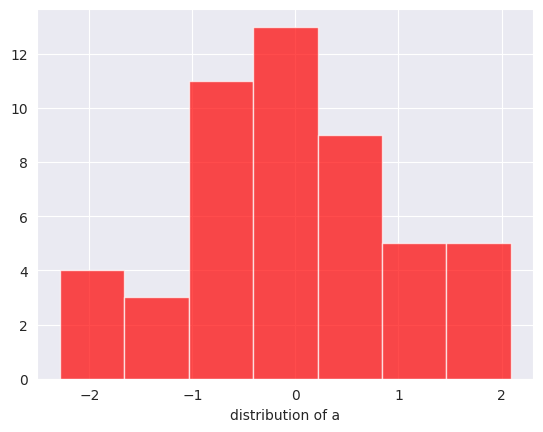

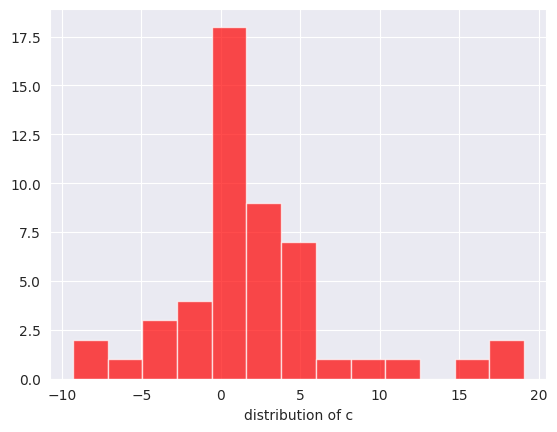

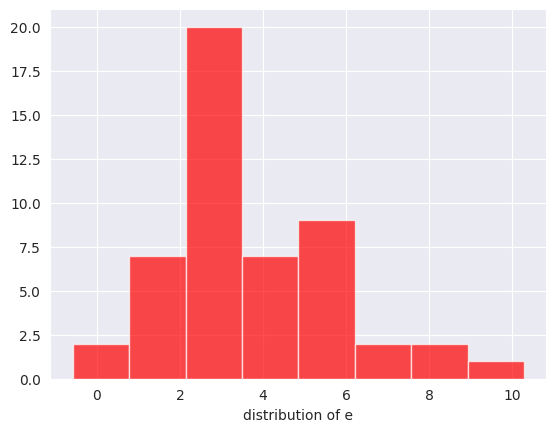

[[-2.2851809248566317,
  -0.18706956154054072,
  -0.8957976180983794,
  1.1581466933559341,
  0.10234227020960239,
  1.3736192657346615,
  1.1273892431992698,
  -0.44909953767250255,
  -0.6703754639657042,
  -0.5911477487426356,
  0.9707919640698808,
  -0.06478064898210775,
  0.06568450599652272,
  2.06572520328337,
  -0.017751670416789177,
  2.090117361150593,
  0.6287442945395556,
  -1.1923899237886326,
  0.1304157104890303,
  -0.29539845351535937,
  0.7009724555947582,
  -2.245188762178732,
  0.17668830362063162,
  -0.012628419207320095,
  -0.7663564245775801,
  2.071726171152614,
  0.3434919575516253,
  0.3786787788307967,
  0.7848923809157177,
  -1.5300066507162222,
  1.6193245417717368,
  -0.5765618436106839,
  -1.6909262654875044,
  -0.08418003967212634,
  -0.530163116343914,
  0.6615568056364518,
  0.13069027727460203,
  -1.6978168496142083,
  1.7778688244194918,
  -0.71339937490706,
  0.7780051343387236,
  -0.2826945513849332,
  0.9115950110925971,
  -0.587270343981821,
  -0.3

In [89]:


# Plot the new sampled data
hscm.plot_data()


KL Divergence

In [90]:
from scipy.stats import gaussian_kde # type: ignore
import tqdm

In [91]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [92]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [93]:

def run_experiment(k):
    results = []
    for _ in tqdm.tqdm(range(k)):
        # Define the HSCM model structure
        nodes = ["a", "b", "c", "d", "e"]
        edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
        unit_nodes = ["a", "c", "e"]
        subunit_nodes = ["d", "b"]
        sizes = [50] * 50# You can adjust this based on your data
        
        # Initialize the HSCM model
        hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
        
        # Define random functions for each node
        random_functions = {
            "a": lambda x: norm.ppf(x, 0, 1),
            "b": lambda x: norm.ppf(x, 0, 1),
            "c": lambda x: norm.ppf(x, 0, 1),
            "d": lambda x: norm.ppf(x, 0, 1),
            "e": lambda x: norm.ppf(x, 0, 1)
        }
        # Define additive functions for each node
        additive_functions = {
            "a": {},
            
            "b": {"a": lambda a: a},
            
            "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
            
            "d": {"b": lambda b: b +1, "c": lambda c: -c},
            
            "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
        }
    
        # Set up the HSCM model
        hscm.additive_model(additive_functions, random_functions)
    
        # Sample data from the model
        sampled_data = hscm.sample_data()
        
        save_sampled_data(sampled_data, f'data/sampled_data_{k}.json')
        
        # Set distributions from the sampled data
        hscm.set_distribution_from_data()
    
        # Resample data
        resampled_data = hscm.resample_data_no_intervention()
        save_sampled_data(resampled_data, f'data/resampled_data_{k}.json')
        
        
        kl_divergences = {}
        for node in unit_nodes:
            original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
            resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
            
            kl_divergences[node] = kl_divergence(original, resampled)
            results.append(kl_divergences)
        
            
    return results

In [94]:

# Run the experiment 100 times
results = run_experiment(100)


100%|██████████| 100/100 [01:50<00:00,  1.10s/it]


if resampled, should be 0, else should be a certain value

In [95]:
print(results)

[{'a': 0.031299308388316474, 'c': 0.5008438024911311, 'e': 0.021380291973275366}, {'a': 0.031299308388316474, 'c': 0.5008438024911311, 'e': 0.021380291973275366}, {'a': 0.031299308388316474, 'c': 0.5008438024911311, 'e': 0.021380291973275366}, {'a': 0.021636681122938328, 'c': 0.06592010339583702, 'e': 0.043660041826289755}, {'a': 0.021636681122938328, 'c': 0.06592010339583702, 'e': 0.043660041826289755}, {'a': 0.021636681122938328, 'c': 0.06592010339583702, 'e': 0.043660041826289755}, {'a': 0.10010807930952668, 'c': 0.29290731438019246, 'e': 0.05247648826862317}, {'a': 0.10010807930952668, 'c': 0.29290731438019246, 'e': 0.05247648826862317}, {'a': 0.10010807930952668, 'c': 0.29290731438019246, 'e': 0.05247648826862317}, {'a': 0.053675156577828564, 'c': 0.10103480950941757, 'e': 0.05237263428575546}, {'a': 0.053675156577828564, 'c': 0.10103480950941757, 'e': 0.05237263428575546}, {'a': 0.053675156577828564, 'c': 0.10103480950941757, 'e': 0.05237263428575546}, {'a': 0.006630950770641215,

/tmp/ipykernel_2091/1790404846.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will n

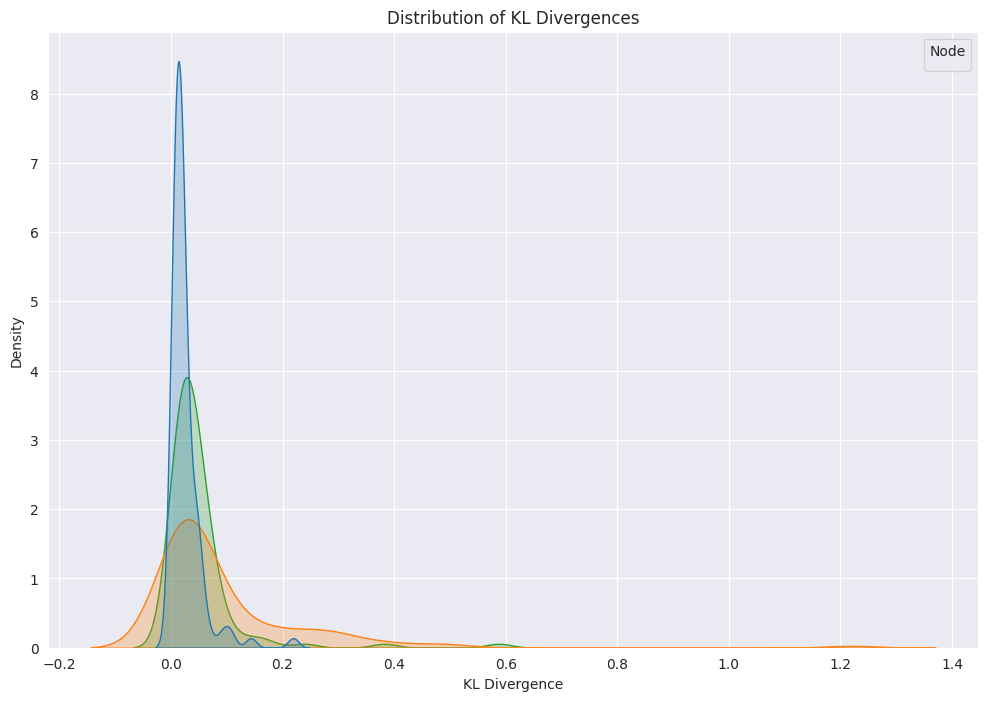

a:
  Mean: 0.0253
  Std Dev: 0.0301
  Min: 0.0014
  Max: 0.2192

c:
  Mean: 0.0968
  Std Dev: 0.1565
  Min: 0.0060
  Max: 1.2209

e:
  Mean: 0.0494
  Std Dev: 0.0735
  Min: 0.0026
  Max: 0.5875



In [96]:
# Analyze the results
import seaborn as sns
import pandas as pd

kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Convert the data to a long format suitable for seaborn
df = pd.DataFrame([(node, div) for node, divs in kl_divergences.items() for div in divs],
                  columns=['Node', 'KL Divergence'])

# Plot the distribution of KL divergences for each node using KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.title('Distribution of KL Divergences')
plt.legend(title='Node')
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [97]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [98]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [99]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [100]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [102]:
def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a KNN classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate and print AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc_roc:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, auc_roc


In [103]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


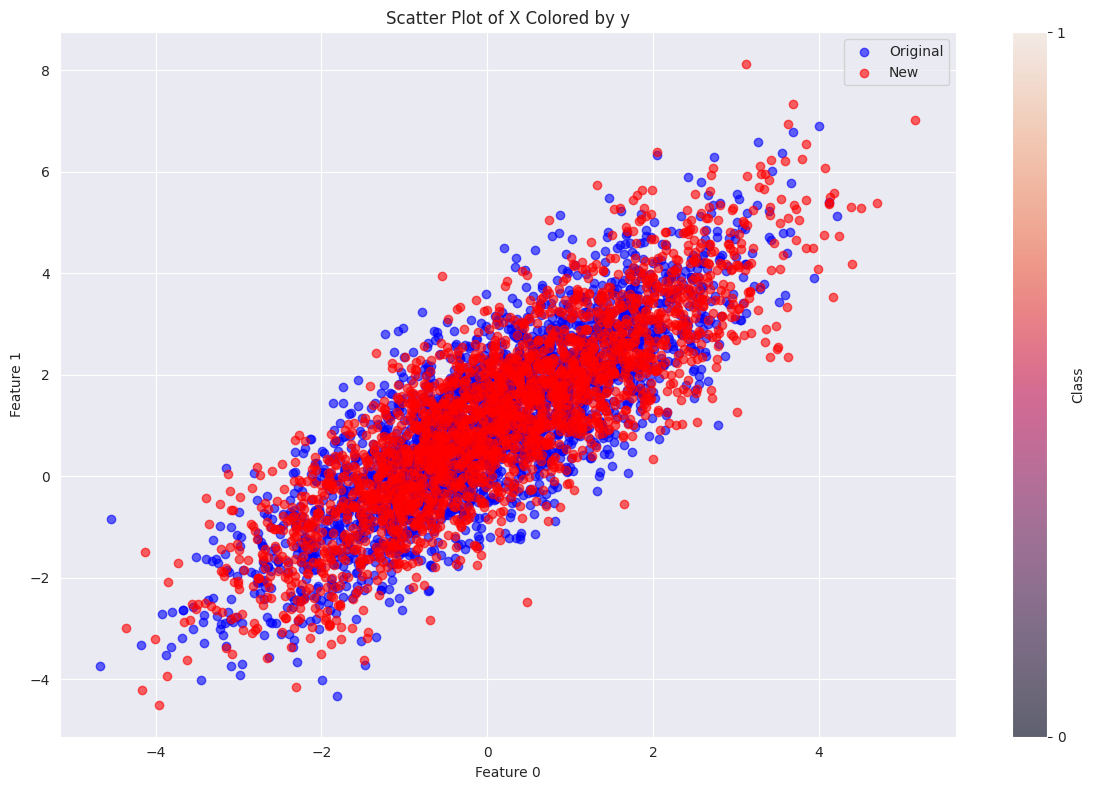

In [104]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


In [105]:
hscm_classification_pipeline(X, y)

Accuracy: 0.51
AUC-ROC Score: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       500
           1       0.51      0.50      0.50       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



(0.506, 0.503096)

In [106]:
def run_classification(k):
    list = []
    for i in range(k):
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json')        
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score,auc_score= hscm_classification_pipeline(X, y)
        list.append((accuracy_score,auc_score))
    return list

In [107]:
liste = run_classification(100)

Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
Accuracy: 0.52
AUC-ROC Score: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       500
           1       0.52      0.50      0.51       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

Data successfully loaded from data/sampled_data_1.json
Data successfully loaded from data/resampled_data_1.json
Accuracy: 0.50
AUC-ROC Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       500
           1       0.50      0.50      0.50       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

Data s

In [116]:
print(liste)

[(0.518, 0.51835), (0.499, 0.50554), (0.505, 0.502052), (0.483, 0.47905), (0.521, 0.521564), (0.512, 0.507846), (0.504, 0.523808), (0.597, 0.63993), (0.561, 0.607292), (0.559, 0.5854380000000001), (0.521, 0.527366), (0.6, 0.6432100000000001), (0.542, 0.5753300000000001), (0.577, 0.616336), (0.565, 0.603476), (0.573, 0.6266020000000001), (0.518, 0.538972), (0.555, 0.5976020000000001), (0.536, 0.568032), (0.547, 0.5687160000000001), (0.567, 0.58985), (0.56, 0.585772), (0.562, 0.61045), (0.576, 0.595194), (0.519, 0.543982), (0.498, 0.49749200000000005), (0.549, 0.582204), (0.523, 0.56174), (0.538, 0.5686359999999999), (0.575, 0.604748), (0.552, 0.571312), (0.559, 0.5859840000000001), (0.558, 0.603892), (0.539, 0.558022), (0.553, 0.5791999999999999), (0.554, 0.57738), (0.566, 0.602106), (0.567, 0.616726), (0.571, 0.5929180000000001), (0.547, 0.577392), (0.528, 0.546148), (0.562, 0.599548), (0.523, 0.545772), (0.538, 0.5593540000000001), (0.586, 0.602472), (0.559, 0.597458), (0.573, 0.59707

In [117]:
print(np.mean(np.array(liste), axis=0))

[0.5519     0.57851166]


In [118]:
print(np.std(np.array(liste)))

0.034573714974111464
